- This notebook reproduces Figure 1, "Performance of three dosing regimens under a linear dose response curve."
- Run each cell in order. Last cell produces figures.
- Originally written with Python 3.12.5 on 20 January 2025
- Necessary packages: NumPy, SciPy, Matplotlib

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

plt.rcParams["text.usetex"] = True


In [8]:
# Functions
def conc(t, dose_size, length_off, frequency, terminate, R0, R1):
    adj_time = (t + length_off) % frequency
    on_off = (length_off < adj_time) & (adj_time < (length_off + frequency))
    return dose_size * on_off


def decay_conc(t, dose_size, lam, terminate, R0, R1):
    return dose_size * np.exp(-lam * t)


def R(x, R0, R1):
    return R0 + R1 * x


def diffeq(t, b, dose_size, length_off, frequency, terminate, R0, R1):
    return (
        R0 + R1 * conc(t, dose_size, length_off, frequency, terminate, R0, R1)
    ) * b


def decay_diffeq(t, b, dose_size, lam, terminate, R0, R1):
    return (R0 + R1 * decay_conc(t, dose_size, lam, terminate, R0, R1)) * b


def event1(t, b, dose_size, length_off, frequency, terminate, R0, R1):
    return b[0] - terminate


def event2(t, b, dose_size, lam, terminate, R0, R1):
    return b[0] - terminate


event1.terminal = True
event2.terminal = True


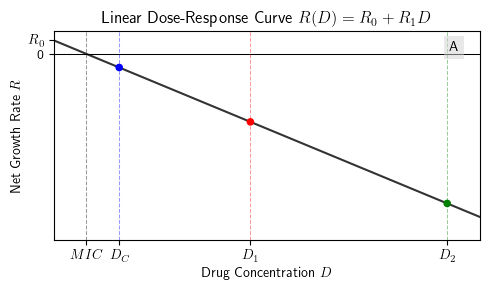

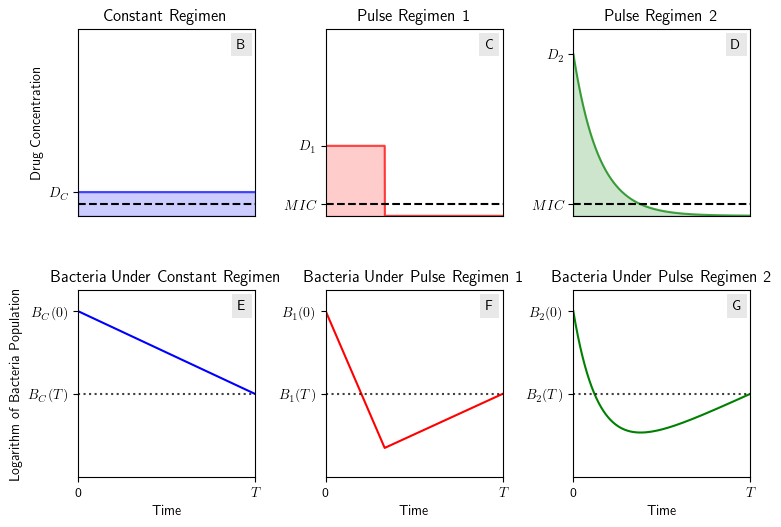

In [13]:
# Constants and initial conditions
scale = 0.7  # Scale for the figure size
AUC = 600
interval = 60
D_C = AUC / interval
times = np.linspace(0, 60, 1000)
drug_conc_C = D_C * np.ones_like(times)
N1 = 20
D1 = AUC / N1
drug_conc_1 = D1 * (times <= N1)
N2 = 10
D2 = AUC / N2


half_life2 = 6
lam2 = np.log(2) / half_life2

A2 = (lam2 * AUC) / (1 - np.exp(-lam2 * interval))
drug_conc_2 = A2 * np.exp(-lam2 * times)

length_off = 200
initial_bac = 1e10
terminate = 1e-9

R0 = 0.15
R1 = -0.0303

doses = np.linspace(0, 70, 1000)


R_vals = R(doses, R0, R1)
MIC_index = np.abs(R_vals).argmin()
MIC = doses[MIC_index]


plt.figure(figsize=(5, 3))
plt.plot(doses, R_vals, color="black", alpha=0.8)
plt.xlabel("Drug Concentration $D$")
plt.ylabel("Net Growth Rate $R$")
plt.title("Linear Dose-Response Curve $R(D)=R_0+R_1D$")
plt.axhline(0, color="black", linewidth=0.75)
plt.axvline(MIC, color="black", alpha=0.4, linestyle="--", linewidth=0.75)
plt.axvline(D_C, color="blue", alpha=0.4, linestyle="--", linewidth=0.75)
plt.axvline(D1, color="red", alpha=0.4, linestyle="--", linewidth=0.75)
plt.axvline(D2, color="green", alpha=0.4, linestyle="--", linewidth=0.75)
plt.scatter(
    [D_C, D1, D2],
    [R(D_C, R0, R1), R(D1, R0, R1), R(D2, R0, R1)],
    color=["blue", "red", "green"],
    s=20,
    zorder=10,
)
plt.xlim(0, 65)
plt.xticks([MIC, D_C, D1, D2], ["$MIC$", "$D_C$", "$D_1$", "$D_2$"])
plt.yticks([0, R0], ["0", "$R_0$"])
plt.tight_layout()
plt.text(
    0.95,
    0.95,
    "A",
    horizontalalignment="right",
    verticalalignment="top",
    transform=plt.gca().transAxes,
    bbox=dict(facecolor="lightgray", alpha=0.5, edgecolor="none"),
)
plt.show()


fig, axs = plt.subplots(2, 3, figsize=(scale * 12, scale * 8))
plt.subplots_adjust(
    left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4
)

# Figure 1b: Constant Dose
axs[0, 0].plot(times, drug_conc_C, color="blue", alpha=0.7)
axs[0, 0].fill_between(times, drug_conc_C, color="blue", alpha=0.2)
axs[0, 0].axhline(MIC, color="black", alpha=1, linestyle="dashed")
axs[0, 0].set_title("Constant Regimen")
axs[0, 0].set_ylabel("Drug Concentration")
axs[0, 0].set_xlim(0, 60)
axs[0, 0].set_ylim(0, 80)
axs[0, 0].set_xticks([])
axs[0, 0].set_yticks([D_C])
axs[0, 0].set_yticklabels(["$D_C$"])

# Figure 1c: Pulse Dose 1
axs[0, 1].plot(times, drug_conc_1, color="red", alpha=0.7)
axs[0, 1].fill_between(times, drug_conc_1, color="red", alpha=0.2)
axs[0, 1].axhline(MIC, color="black", alpha=1, linestyle="dashed")
axs[0, 1].set_title("Pulse Regimen 1")
axs[0, 1].set_xlim(0, 60)
axs[0, 1].set_ylim(0, 80)
axs[0, 1].set_xticks([])
axs[0, 1].set_yticks([D1, MIC])
axs[0, 1].set_yticklabels(["$D_1$", "$MIC$"])

# Figure 1d: Pulse Dose 2
axs[0, 2].plot(times, drug_conc_2, color="green", alpha=0.7)
axs[0, 2].fill_between(times, drug_conc_2, color="green", alpha=0.2)
axs[0, 2].axhline(MIC, color="black", alpha=1, linestyle="dashed")
axs[0, 2].set_title("Pulse Regimen 2")
axs[0, 2].set_xlim(0, 60)
axs[0, 2].set_ylim(0, 80)
axs[0, 2].set_xticks([])
axs[0, 2].set_yticks([A2, MIC])
axs[0, 2].set_yticklabels(["$D_2$", "$MIC$"])

# Figure 1e: Constant regimen bacteria population
dose_size = D_C
length_on = interval
frequency = length_on + length_off
sol_C = solve_ivp(
    diffeq,
    (0, 60),
    [initial_bac],
    method="RK45",
    rtol=terminate,
    atol=terminate,
    events=event1,
    args=(dose_size, length_off, frequency, terminate, R0, R1),
)
end_bac = sol_C.y[0][-1]
axs[1, 0].semilogy(sol_C.t, sol_C.y[0], color="blue", alpha=1)
axs[1, 0].axhline(end_bac, color="black", alpha=0.75, linestyle="dotted")
axs[1, 0].set_ylim(1e2, 10 * initial_bac)
axs[1, 0].set_xlim(0, 60)
axs[1, 0].set_title("Bacteria Under Constant Regimen")
axs[1, 0].set_xlabel("Time")
axs[1, 0].set_ylabel("Logarithm of Bacteria Population")
axs[1, 0].set_xticks([0, interval])
axs[1, 0].set_xticklabels(["0", "$T$"])
axs[1, 0].set_yticks([end_bac, initial_bac])
axs[1, 0].set_yticklabels(["$B_C(T)$", "$B_C(0)$"])

# Figure 1f: Pulse regimen 1 bacteria population
dose_size = D1
length_on = N1
frequency = length_on + length_off
sol_1 = solve_ivp(
    diffeq,
    (0, 60),
    [initial_bac],
    method="RK45",
    rtol=terminate,
    atol=terminate,
    events=event1,
    args=(dose_size, length_off, frequency, terminate, R0, R1),
)
end_bac = sol_1.y[0][-1]
axs[1, 1].semilogy(sol_1.t, sol_1.y[0], color="red", alpha=1)
axs[1, 1].set_ylim(1e2, 10 * initial_bac)
axs[1, 1].set_xlim(0, 60)
axs[1, 1].axhline(end_bac, color="black", alpha=0.75, linestyle="dotted")
axs[1, 1].set_title("Bacteria Under Pulse Regimen 1")
axs[1, 1].set_xlabel("Time")
axs[1, 1].set_xticks([0, interval])
axs[1, 1].set_xticklabels(["0", "$T$"])
axs[1, 1].set_yticks([end_bac, initial_bac])
axs[1, 1].set_yticklabels(["$B_1(T)$", "$B_1(0)$"])

# Figure 1g: Pulse regimen 2 bacteria population

sol_2 = solve_ivp(
    decay_diffeq,
    (0, 60),
    [initial_bac],
    method="RK45",
    rtol=terminate,
    atol=terminate,
    events=event2,
    args=(A2, lam2, terminate, R0, R1),
)
end_bac = sol_2.y[0][-1]
axs[1, 2].semilogy(sol_2.t, sol_2.y[0], color="green", alpha=1)
axs[1, 2].axhline(end_bac, color="black", alpha=0.75, linestyle="dotted")
axs[1, 2].set_ylim(1e2, 10 * initial_bac)
axs[1, 2].set_xlim(0, 60)
axs[1, 2].set_title("Bacteria Under Pulse Regimen 2")
axs[1, 2].set_xlabel("Time")
axs[1, 2].set_xticks([0, interval])
axs[1, 2].set_xticklabels(["0", "$T$"])
axs[1, 2].set_yticks([end_bac, initial_bac])
axs[1, 2].set_yticklabels(["$B_2(T)$", "$B_2(0)$"])

labels = [["B", "C", "D"], ["E", "F", "G"]]
for i in range(2):
    for j in range(3):
        axs[i, j].text(
            0.95,
            0.95,
            labels[i][j],
            horizontalalignment="right",
            verticalalignment="top",
            transform=axs[i, j].transAxes,
            bbox=dict(facecolor="lightgray", alpha=0.5, edgecolor="none"),
        )

plt.show()
